<a href="https://colab.research.google.com/github/MohammedAbraar302/pet-adoption-system/blob/main/AIML_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# load and splits the dataset into training and testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_test.shape

NameError: name 'X_test' is not defined

In [2]:
y_train

NameError: name 'y_train' is not defined

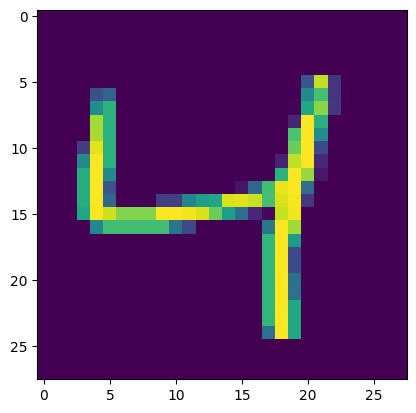

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

# normalises pixel values of images
'''
Why 255?
Each image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).

Dividing by 255 scales all pixel values to a range of 0.0 to 1.0.

'''

'\nWhy 255?\nEach image is 28×28 pixels, and each pixel value ranges from 0 to 255 (grayscale intensity).\n\nDividing by 255 scales all pixel values to a range of 0.0 to 1.0.\n\n'

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential() # initialises a seqential model, so basically the layers are added one after the other
# so the models output from one layer is passed on as input to the next layer

model.add(Flatten(input_shape=(28,28))) # 2D input to 1D vector
model.add(Dense(128,activation='relu')) # rectified linear unit(turns -ve to zeros and keeps positive as is)
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) # converts raw output values into probabilities


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# loss function is used to calculate how well the model's predictions match the actual labels during training
# Sparse Categorical Cross-Entropy because of multi class classfication
# optimizer controls how the models weights are updated

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)
#bascially trains the model on data to classify images into correct labels and
#epochs is how many times the models will look at the training dataset
#20% of the training data will be used for validation during training
#history object keeps track of how well the model did during each epoch.

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8654 - loss: 0.4652 - val_accuracy: 0.9587 - val_loss: 0.1481
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1267 - val_accuracy: 0.9646 - val_loss: 0.1176
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9743 - loss: 0.0838 - val_accuracy: 0.9676 - val_loss: 0.1091
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9810 - loss: 0.0622 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0437 - val_accuracy: 0.9739 - val_loss: 0.0894
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9887 - loss: 0.0357 - val_accuracy: 0.9711 - val_loss: 0.1053
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9906 - loss: 0.0273 - val_accuracy: 0.9692 - val_loss: 0.1106
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9907 - loss: 0.0273

In [ ]:
y_pred = y_prob.argmax(axis=1)
#y_prob contains the predicted probabilities for each
#argmax() is a function that returns the index of the maximum value in an array

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.976

In [1]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#Training loss: How well the model is learning on the training data.



NameError: name 'plt' is not defined

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

NameError: name 'plt' is not defined

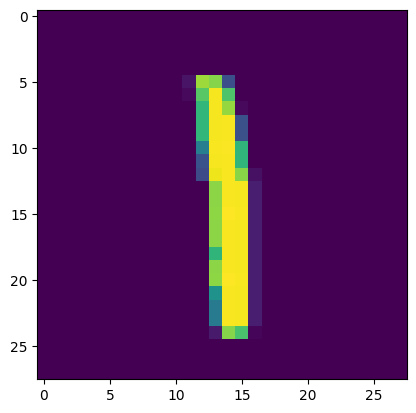

In [11]:
plt.imshow(X_test[37])

In [ ]:
model.predict(X_test[45].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([5])